In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc("font", family="serif", size=16)
rc("lines", linewidth=1.5)
plt.rc("legend", **{"fontsize":14})

In [2]:
Nx = 101
xmax = 2.0
xmin = -2.0
Lx = xmax-xmin
dx = Lx/(Nx-1)
x = np.linspace(xmin, xmax, Nx)

dt = 0.04
t_end = 5.0

Nt = int(t_end/dt)
a = 0.8
CFL = a*dt/dx
U = np.zeros((Nt+1, Nx))
U[0,:] = np.exp(-0.5*(x/0.4)**2)
Uex = U[0,:]

In [5]:
for n in range(0, Nt):
    if a > 0.0:
        for i in range(1, Nx):
            U[n + 1, i] = U[n, i] - CFL * (U[n, i] - U[n, i - 1])
        U[n + 1, 0] = U[n + 1, Nx - 1]
    else:
        for i in range(0, Nx - 1):
            U[n + 1, i] = U[n, 1] - CFL * (U[n, i + 1] - U[n, i])
        U[n + 1, Nx - 1] = U[n, 0]



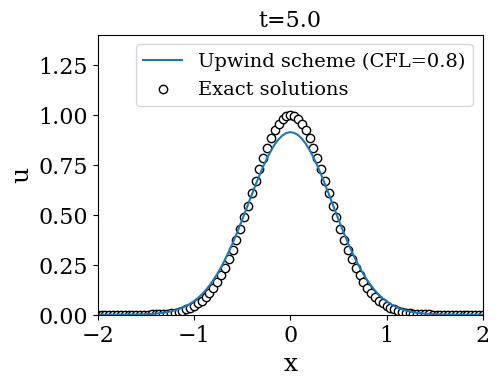

In [16]:
d = a * (n + 1) * dt
Uex = np.exp(-0.5 * (np.mod(x - d + xmax, 4) - xmax) ** 2 / 0.4**2)

fig, ax = plt.subplots(figsize=(5.5, 4))
# plt.clf()
plt.plot(x, U[n + 1, :])
plt.scatter(x,Uex, marker="o", facecolors='white', color='k')
plt.gca().legend((f"Upwind scheme (CFL={CFL})", "Exact solutions"))

plt.axis([xmin, xmax, 0, 1.4])
plt.title(f"t={round(dt*(n+1),3)}", fontsize=16)
plt.xlabel("x", fontsize=18)
plt.ylabel("u", fontsize=18)
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(bottom=0.18)


((126, 101), (101,))